In [1]:
from IPython.display import clear_output

In [2]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install numpy
%pip install pillow
%pip install matplotlib
%pip install torchvision  # for MNIST dataset

clear_output()

In [3]:
import torchvision
import numpy as np

import torch.nn.functional as F

import matplotlib.pyplot as plt

from PIL import Image

#Contents:

1. Implement DCT based image compression in numpy.


You need to know:

1. **numpy** (for impelementation)
2. a little bit of **matplotlib** (for visualization)
3. Pillow (only a little bit)

### Load the dataset
 we will use images from mnist for our img compression

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)
original_imgs = [train_dataset[i][0] for i in range(10)]

100%|██████████| 9912422/9912422 [00:00<00:00, 30887449.21it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 74270811.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42770155.64it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13539821.44it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Let's move towards the compression part

In [5]:
def get_greyscale_dct_bases(img, num_bases):

  if isinstance(img, Image.Image):
    img = np.array(img.convert('L'))

  if not isinstance(img, np.ndarray) or len(img.shape) != 2:
    raise ValueError('Image must be greyscale, converted to numpy form')

  nr, nc = np.shape(img)

  xr = np.arange(nr)/nr
  xc = np.arange(nc)/nc

  X1,X2 = np.meshgrid(xr,xc)

  I = np.arange(num_bases)
  J = np.arange(num_bases)

  X1 = X1[:, :, np.newaxis, np.newaxis]
  X2 = X2[:, : ,np.newaxis, np.newaxis]

  I = I[np.newaxis, np.newaxis, : , np.newaxis]
  J = J[np.newaxis, np.newaxis,  np.newaxis,:]

  bases = np.cos(np.pi*I*X1)*np.cos(np.pi*J*X2)
  bases = np.reshape(bases, (-1, bases.shape[2]*bases.shape[3]))

  return bases

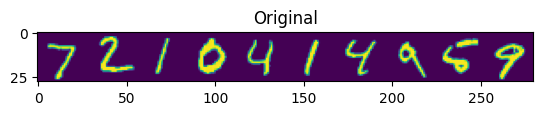

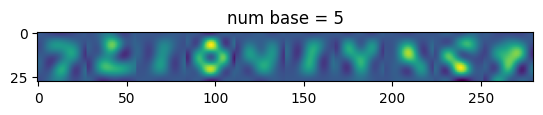

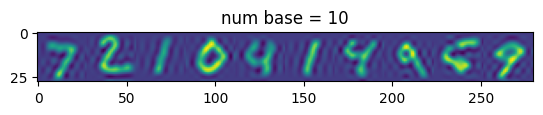

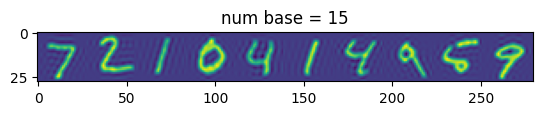

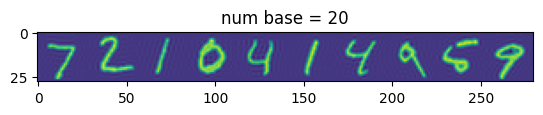

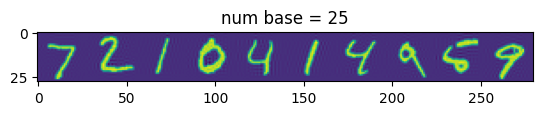

In [6]:
nb_options = [5, 10, 15, 20, 25]  # lets see the effect of making increasing number of bases
generated_plots = []

big_original = np.concatenate(original_imgs, axis=1)
plt.title('Original')
plt.imshow(big_original)

for nb in nb_options:

  bases = [get_greyscale_dct_bases(img, nb) for img in original_imgs]
  compressed_imgs = []

  bases = np.array(bases)

  for base, img in zip(bases, original_imgs):

    w = np.linalg.solve(base.T@base, base.T@ np.reshape(img, (-1,1)))
    compressed_img = base@w
    compressed_img = compressed_img.reshape((img.height, img.width))  # bring back to shape from flattened img

    compressed_imgs.append(compressed_img)

  big_compressed = np.concatenate(compressed_imgs, axis=1)

  plt.figure()
  plt.title(f'num base = {nb}')
  plt.imshow(big_compressed)
